# **Import library for view dataset**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pickle

# **Mounted Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **View list dataset**

In [3]:
dataset_dir = '/content/drive/MyDrive/ปี 4 เทอม 2/ML/WineQuality/winequality-red.csv'
dataset_onPC = 'D:\Work\ML\RedWineQuality\winequality-red.csv'
df = pd.read_csv(dataset_onPC)

In [14]:
# ดูข้อมูลส่วนแรกสุด 5 แถว
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
# Random data (10)
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1540,6.2,0.520,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,6
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,6
110,7.8,0.560,0.19,1.8,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,5
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
530,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3,5
202,6.8,0.500,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,5
1202,8.6,0.420,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
50,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,5


In [16]:
# validate missing data
df.isnull().sum()
# 0 it's mean that column no missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

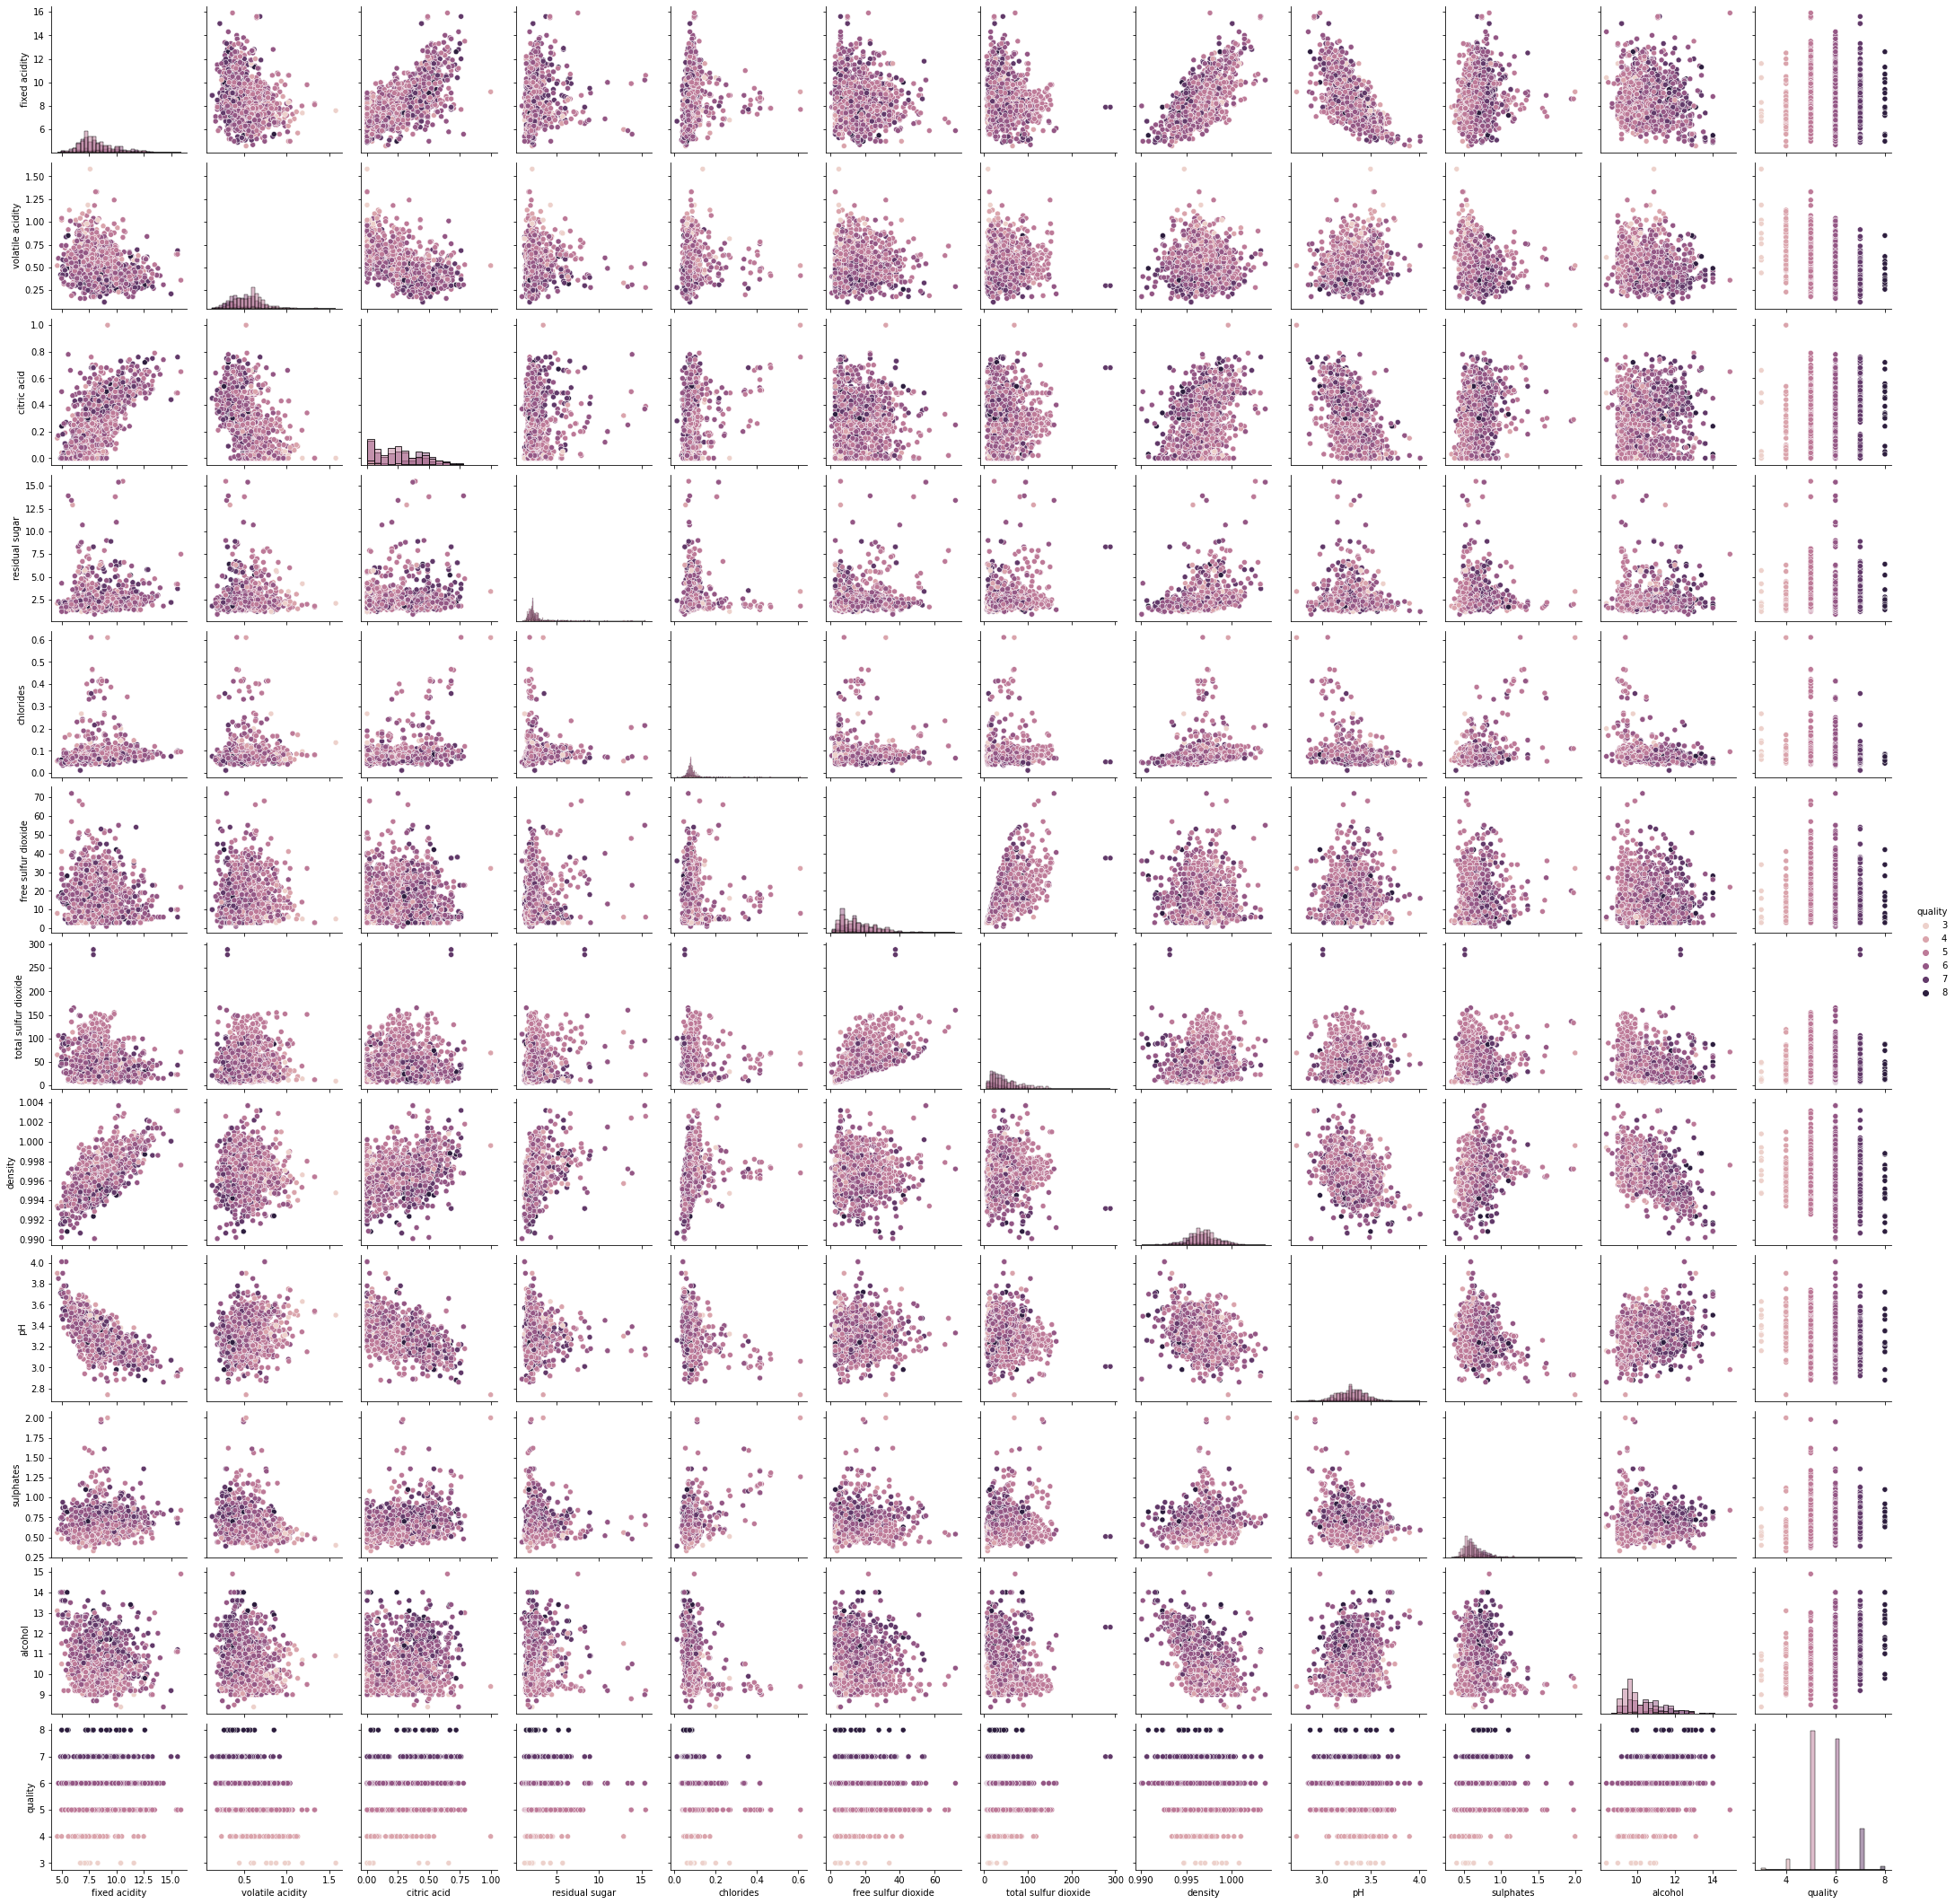

In [17]:
# Pair Plot for view all data
sns.pairplot(df, 
             vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], 
             hue = 'quality', 
             diag_kind = 'hist')

# **KNN Algorithm**

In [4]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
scaler = StandardScaler()

In [6]:
# Calculate mean and std value with drop quality because quality it's answer
scaler.fit(df.drop('quality', axis = 1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('quality', axis = 1))

In [8]:
# Print Mean, Variance and Standard deviation of feature value
print('Mean: \n{}' .format(scaler.mean_))
print('Variance: \n{}' .format(scaler.var_))
print('Standard deviation: \n{}' .format(scaler.scale_))

Mean: 
[ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]
Variance: 
[3.02952057e+00 3.20423261e-02 3.79237511e-02 1.98665392e+00
 2.21375732e-03 1.09346457e+02 1.08142564e+03 3.55980179e-06
 2.38202742e-02 2.87146470e-02 1.13493717e+00]
Standard deviation: 
[1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]


In [9]:
# Create DataFrame of feature value
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
# View top 5 row
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [10]:
# Train, Test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['quality'], test_size = 0.2, random_state = 30)

In [11]:
# Create model
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [12]:
# Fit model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Predict
knn_predict = knn_model.predict(X_test)
knn_predict

array([7, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 7,
       7, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 5, 7, 5, 6, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 7, 7, 7, 6, 6, 5, 6, 5, 5,
       5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 7, 5,
       6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5, 7, 5, 7, 5, 5, 5,
       5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 6,
       6, 7, 6, 8, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 8, 6, 6, 5, 7, 6, 7,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 7, 5, 6, 5, 6, 5, 7, 7, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6, 6, 7,
       6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 7, 6, 5, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 5, 7, 7, 5, 6, 6, 6, 7, 6, 6,

# **Evaluated Model**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
# Accuracy of train set
print('Score: {}' .format(knn_model.score(X_train, y_train)))

Score: 0.7138389366692729


In [16]:
# Confusion Matrix of Model
print('Confusion Matrix: \n{}' .format(confusion_matrix(y_test, knn_predict)))

Confusion Matrix: 
[[ 0  0  2  0  0  0]
 [ 0  0  7  6  1  0]
 [ 0  0 86 44  4  0]
 [ 0  1 31 81 13  2]
 [ 0  0  2 18 19  0]
 [ 0  0  0  1  2  0]]


In [17]:
# Report model
print('Report Model: \n{}' .format(classification_report(y_test, knn_predict)))

Report Model: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.67      0.64      0.66       134
           6       0.54      0.63      0.58       128
           7       0.49      0.49      0.49        39
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.56      0.58      0.57       320



C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Accuracy test set
print('Accuracy of test set: {}' .format(accuracy_score(y_test, knn_predict)))

Accuracy of test set: 0.58125


# **Plot Error rate for decision selected K-value**

In [33]:
error_rate = []
for i in range(1, 200):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

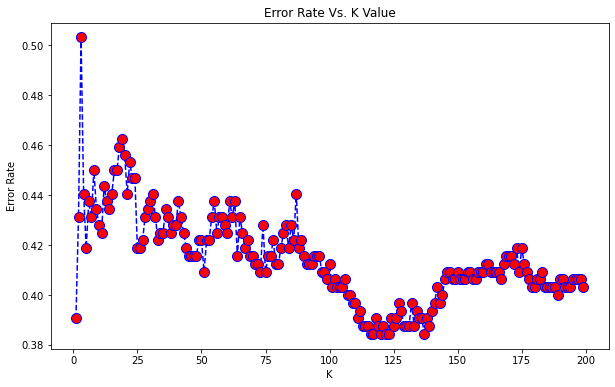

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 200), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate Vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**จาก Graph ที่ plot จะเห็นว่าที่ค่า k ประมาณ 123 จะได้ error ที่ต่ำที่สุด**

# **Change K = 123 and train model**

In [35]:
knn_new_model = KNeighborsClassifier(n_neighbors = 123)
knn_new_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=123)

In [36]:
predict_knn_new_model = knn_new_model.predict(X_test)

In [37]:
# Confusion Matrix New model
print('Confusion Matrix: \n{}' .format(confusion_matrix(y_test, knn_predict)))

Confusion Matrix: 
[[ 0  0  2  0  0  0]
 [ 0  0  7  6  1  0]
 [ 0  0 86 44  4  0]
 [ 0  1 31 81 13  2]
 [ 0  0  2 18 19  0]
 [ 0  0  0  1  2  0]]


In [38]:
# Report model
print('Report Model: \n{}' .format(classification_report(y_test, knn_predict)))

Report Model: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.67      0.64      0.66       134
           6       0.54      0.63      0.58       128
           7       0.49      0.49      0.49        39
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.56      0.58      0.57       320



C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AnurakCh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Accuracy test set
print('Accuracy of test set: {}' .format(accuracy_score(y_test, knn_predict)))

Accuracy of test set: 0.58125


In [40]:
# Test Predict from other data
X_input = np.array([[7.5, 0.5, 0.00, 1.5, 0.082, 11.2, 35.0, 0.9900, 3.48, 0.58, 9.6]])
X_input

array([[ 7.5  ,  0.5  ,  0.   ,  1.5  ,  0.082, 11.2  , 35.   ,  0.99 ,
         3.48 ,  0.58 ,  9.6  ]])

In [41]:
# print predict quality
print('Quality: {}' .format(knn_new_model.predict(X_input)))

Quality: [5]


# **Save model with pickle**

In [21]:
filename = 'knn_predict_redwine_quality.pkl'
pickle.dump(knn_model, open(filename, 'wb'))

# **Test Load model and predict**

In [22]:
filename = 'knn_predict_redwine_quality.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [23]:
# Load model and predict with random data
x_test_load_model = np.array([[7.4, 0.4, 0.00, 1.89, 0.090, 10.2, 35.0, 0.230, 3.89, 0.23, 9.3], 
                              [8.6, 0.420, 0.39, 1.9, 0.062, 6.1, 12.2, 0.99517, 3.34, 0.69, 11.8]])
test_predict = model.predict(x_test_load_model)
print('Predict : {}' .format(test_predict))

Predict : [5 7]
